## Загрузка и первичная обработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Chekun\Downloads\Data для тестового - Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Название рассылки       218 non-null    object
 1   Название кампании       218 non-null    object
 2   Направление             218 non-null    object
 3   Месяц                   218 non-null    object
 4   Дата                    218 non-null    object
 5   Год                     218 non-null    int64 
 6   Номер недели            218 non-null    int64 
 7   День недели             218 non-null    int64 
 8   День недели.1           218 non-null    object
 9   Время                   218 non-null    object
 10  Веб-версия              218 non-null    object
 11  Тема письма             218 non-null    object
 12  Сегмент                 218 non-null    object
 13  Отправлено              218 non-null    object
 14  Доставлено              218 non-null    object
 15  Открыт

In [4]:
# избавляемся от экселевских разделителей разрядов 
df = df.replace(r'(?<=\d)[\s\u00A0]+(?=\d)', '', regex=True)

In [5]:
# создадим новую категорию для более общего анализа кампаний
df['Дата'] = pd.to_datetime(df['Дата'], format='%d.%m.%Y', errors='coerce')
df['Год_месяц'] = pd.to_datetime(df['Дата']).dt.to_period('M')
df['Год_месяц']

0      2021-10
1      2021-11
2      2022-04
3      2022-04
4      2022-04
        ...   
213    2022-03
214    2022-03
215    2022-03
216    2022-03
217    2022-03
Name: Год_месяц, Length: 218, dtype: period[M]

In [6]:
# приводим числовые данные к соответствующему типу
for i in ['Доставлено', 'Отправлено', 'Открытия', 'Клики', 'Отписки', 'Пользователей на сайте']:
    df[i] = pd.to_numeric(df[i], errors='coerce')
    df[i] = df[i].astype('Int64')

### Расчет основных метрик для email-рассылок

In [7]:
# посмотрим на динамику метрик в разрезе месяцев года
date_pivot = df.pivot_table(index='Год_месяц', values=['Доставлено', 
                                                       'Отправлено', 
                                                       'Открытия', 
                                                       'Клики', 
                                                       'Пользователей на сайте', 
                                                       'Отписки',
                                                       'Воронка продаж. Шаг 1', 
                                                       'Воронка продаж. Шаг 2', 
                                                       'Воронка продаж. Шаг 3'], aggfunc='sum').reset_index()

date_pivot['Delivery_rate'] = date_pivot['Доставлено'] / date_pivot['Отправлено'] * 100
date_pivot['Open_rate'] = date_pivot['Открытия'] / date_pivot['Доставлено'] * 100
date_pivot['CTR'] = date_pivot['Клики'] / date_pivot['Доставлено'] * 100
date_pivot['Click_to_Open_rate'] = date_pivot['Клики'] / date_pivot['Открытия'] * 100
date_pivot['Visit_to_Click_rate'] = date_pivot['Пользователей на сайте'] / date_pivot['Клики'] * 100
date_pivot['Unsubscribe_rate'] = date_pivot['Отписки'] / date_pivot['Доставлено'] * 100
date_pivot['Funnel_rate_1'] = date_pivot['Воронка продаж. Шаг 2'] / date_pivot['Воронка продаж. Шаг 1'] * 100
date_pivot['Funnel_rate_2'] = date_pivot['Воронка продаж. Шаг 3'] / date_pivot['Воронка продаж. Шаг 2'] * 100

date_pivot.drop(['Доставлено', 'Отправлено', 'Открытия', 'Клики', 'Пользователей на сайте', 'Отписки',
                  'Воронка продаж. Шаг 1', 'Воронка продаж. Шаг 2', 'Воронка продаж. Шаг 3'], axis=1, inplace=True)
date_pivot

,Год_месяц,Delivery_rate,Open_rate,CTR,Click_to_Open_rate,Visit_to_Click_rate,Unsubscribe_rate,Funnel_rate_1,Funnel_rate_2
0,2021-04,95.000014,15.543986,1.427037,9.180639,88.632245,0.689994,91.917175,75.819163
1,2021-05,95.872521,15.066988,1.363686,9.050818,84.0997,0.629999,86.358782,76.581472
2,2021-06,98.110322,15.299812,1.156365,7.558036,86.463831,0.616358,86.902979,77.735223
3,2021-07,98.078735,14.844424,1.104821,7.442664,86.818293,0.600012,85.517055,79.410302
4,2021-08,98.176584,15.265231,1.118452,7.326792,88.169437,0.563606,82.608165,76.479279
5,2021-09,97.480377,12.00331,0.971316,8.092064,88.346658,0.564189,86.282828,78.438731
6,2021-10,97.255058,13.639248,1.150794,8.437368,90.00653,2.080512,86.555015,78.713413
7,2021-11,97.816036,13.236578,1.098019,8.295337,87.199476,2.78844,85.044015,79.036829
8,2021-12,98.176508,13.47941,1.065061,7.901392,87.970163,5.327606,86.404597,78.459566
9,2022-01,98.137304,12.981977,1.070135,8.243236,88.205121,4.021883,88.486256,79.159710


In [8]:
# средние показатели
date_pivot.mean().round(2).to_frame().T

,Delivery_rate,Open_rate,CTR,Click_to_Open_rate,Visit_to_Click_rate,Unsubscribe_rate,Funnel_rate_1,Funnel_rate_2
0,97.17,14.12,1.16,8.22,88.08,1.52,87.27,77.55


### Выявим лучшую тему

In [9]:
# смотрим на метрики в разрезе темы рассылки
email_pivot = df[['Тема письма ', 'Доставлено', 'Отправлено', 'Открытия', 'Клики', 'Пользователей на сайте', 'Отписки',
                  'Воронка продаж. Шаг 1', 'Воронка продаж. Шаг 2', 'Воронка продаж. Шаг 3']].copy()

email_pivot['Open_rate'] = email_pivot['Открытия'] / email_pivot['Доставлено']
email_pivot['Click_to_Open_rate'] = email_pivot['Клики'] / email_pivot['Открытия']
email_pivot['Unsubscribe_rate'] = email_pivot['Отписки'] / email_pivot['Доставлено']
email_pivot['Funnel_rate_1'] = email_pivot['Воронка продаж. Шаг 2'] / email_pivot['Воронка продаж. Шаг 1']
email_pivot['Funnel_rate_2'] = email_pivot['Воронка продаж. Шаг 3'] / email_pivot['Воронка продаж. Шаг 2']

email_pivot.drop(['Доставлено', 'Отправлено', 'Открытия', 'Клики', 'Пользователей на сайте', 'Отписки',
                  'Воронка продаж. Шаг 1', 'Воронка продаж. Шаг 2', 'Воронка продаж. Шаг 3'], axis=1, inplace=True)
email_pivot

,Тема письма,Open_rate,Click_to_Open_rate,Unsubscribe_rate,Funnel_rate_1,Funnel_rate_2
0,Тема письма 1,0.2,0.12,0.009999,0.979959,0.829952
1,Тема письма 10,0.179999,0.089999,0.01,0.870152,0.820090
2,Тема письма 100,0.16,0.084002,0.01,0.849852,0.790154
3,Тема письма 101,0.2,0.038999,0.01,0.836005,0.750058
4,Тема письма 102,0.18,0.071999,0.01,0.811857,0.730214
...,...,...,...,...,...,...
213,Тема письма 95,0.1743,0.039,0.009,0.980012,0.790040
214,Тема письма 96,0.1105,0.072002,0.009,0.869792,0.830090
215,Тема письма 97,0.092,0.119999,0.009,0.850072,0.819966
216,Тема письма 98,0.1105,0.09,0.009,0.750098,0.789874


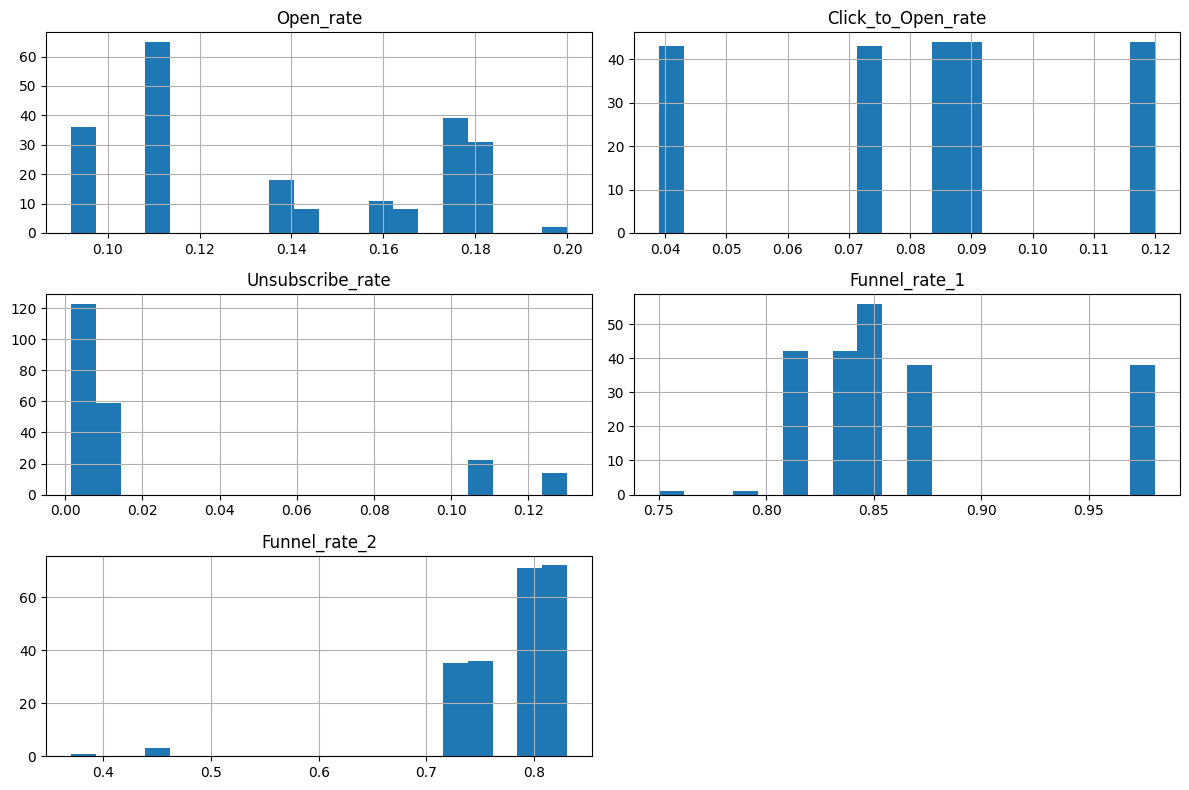

In [10]:
# посмотрим на распределения признаков
email_pivot.hist(bins=20, figsize=(12, 8))
plt.tight_layout()

In [11]:
# посмотрим на распределения признаков
email_pivot.describe().round(5)

,Open_rate,Click_to_Open_rate,Unsubscribe_rate,Funnel_rate_1,Funnel_rate_2
count,218.00000,218.00000,218.00000,218.00000,218.00000
mean,0.13764,0.08123,0.02470,0.86540,0.77879
std,0.03392,0.02631,0.04174,0.05631,0.05904
min,0.09200,0.03899,0.00150,0.75010,0.36995
25%,0.11050,0.07200,0.00570,0.83597,0.75000
50%,0.13990,0.08400,0.00630,0.84999,0.78998
75%,0.17430,0.09000,0.00900,0.86999,0.81998
max,0.20000,0.12001,0.13000,0.98100,0.83061


Избавимся от негативных выбросов для корректного ранжирования признаков после нормализации, чтобы подготовить данные к расчету финального рейтинга.

In [12]:
email_pivot = email_pivot[email_pivot['Unsubscribe_rate'] < 0.1]
email_pivot = email_pivot[email_pivot['Funnel_rate_2'] > 0.6]

Высокий рейтинг отписок не может быть признаком хорошей рассылки (даже если последующий процент покупок будет высоким), потому что мы выявляем **лучшую тему**, а не самый выгодный в абсолютных числах случай. Считаю правильным удалить такие наблюдения вручную, даже если по другим конверсиям все хорошо.

Кроме того, для бизнес-анализа низкие конверсии на этапе воронки – это плохой сигнал. Такие темы нельзя считать успешными.

In [13]:
email_pivot.describe().round(5)

,Open_rate,Click_to_Open_rate,Unsubscribe_rate,Funnel_rate_1,Funnel_rate_2
count,178.00000,178.00000,178.00000,178.00000,178.00000
mean,0.13858,0.08129,0.00624,0.86511,0.78527
std,0.03366,0.02631,0.00236,0.05648,0.03552
min,0.09200,0.03899,0.00150,0.75010,0.72982
25%,0.11050,0.07200,0.00570,0.83597,0.75000
50%,0.14000,0.08400,0.00600,0.84998,0.78998
75%,0.17430,0.09000,0.00900,0.86998,0.81998
max,0.20000,0.12001,0.01000,0.98018,0.83061


Инвертируем показатель отписок, чтобы в финальном расчете рейтинга привести все к логичной шкале, где **чем выше показатель, тем лучше результат**. Это также избавляет от опасного деления при расчете финального скоринга.

In [14]:
email_pivot['UR_flip'] = email_pivot['Unsubscribe_rate'].max() - email_pivot['Unsubscribe_rate']

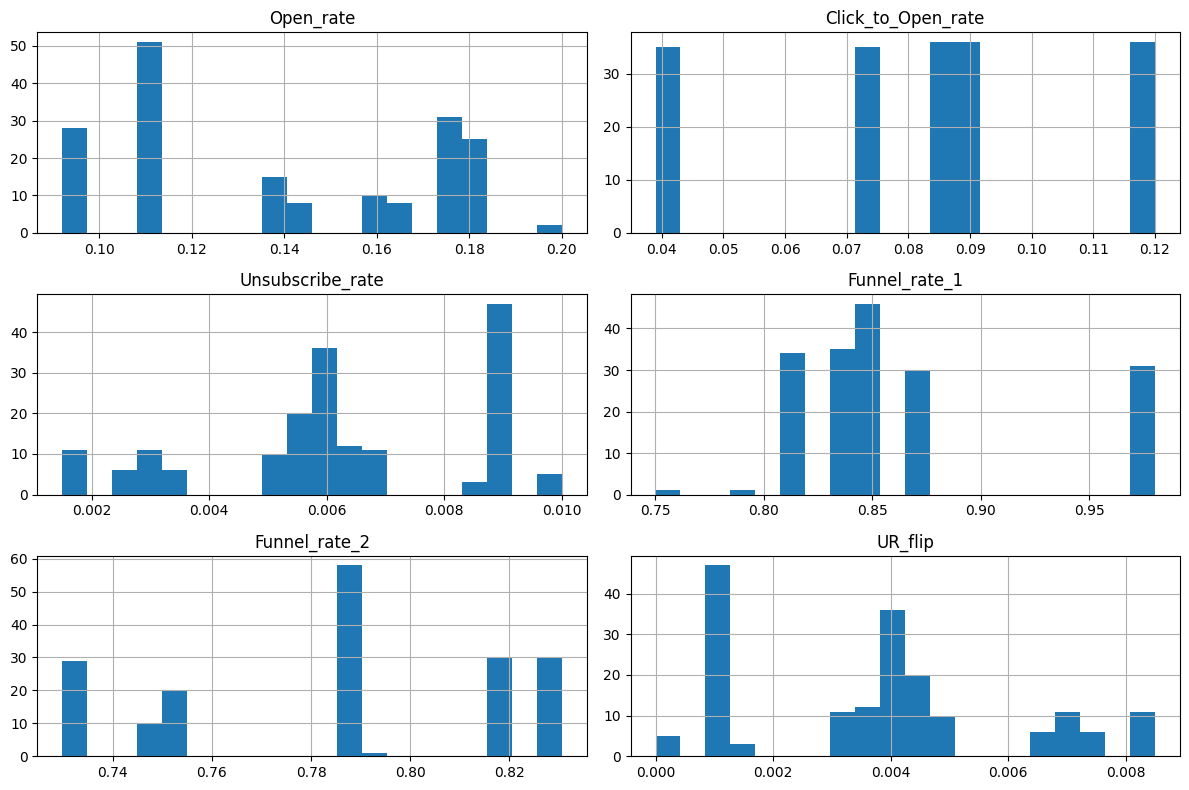

In [15]:
email_pivot.hist(bins=20, figsize=(12, 8))
plt.tight_layout()

Нормируем все показатели после удаления выбросов, чтобы подготовить их к расчету финального рейтинга. Каждый признак приводится к одному масштабу, чтобы все показатели **равноценно участвовали** в формировании рейтинга.

In [16]:
email_pivot['CTOR'] = (email_pivot['Click_to_Open_rate'] - email_pivot['Click_to_Open_rate'].min()) / \
                      (email_pivot['Click_to_Open_rate'].max() - email_pivot['Click_to_Open_rate'].min())

email_pivot['UR_flip'] = (email_pivot['UR_flip'] - email_pivot['UR_flip'].min()) / \
                         (email_pivot['UR_flip'].max() - email_pivot['UR_flip'].min())

email_pivot['F1'] = (email_pivot['Funnel_rate_1'] - email_pivot['Funnel_rate_1'].min()) / \
                    (email_pivot['Funnel_rate_1'].max() - email_pivot['Funnel_rate_1'].min())

email_pivot['F2'] = (email_pivot['Funnel_rate_2'] - email_pivot['Funnel_rate_2'].min()) / \
                    (email_pivot['Funnel_rate_2'].max() - email_pivot['Funnel_rate_2'].min())

email_pivot['OR'] = (email_pivot['Open_rate'] - email_pivot['Open_rate'].min()) / \
                    (email_pivot['Open_rate'].max() - email_pivot['Open_rate'].min())

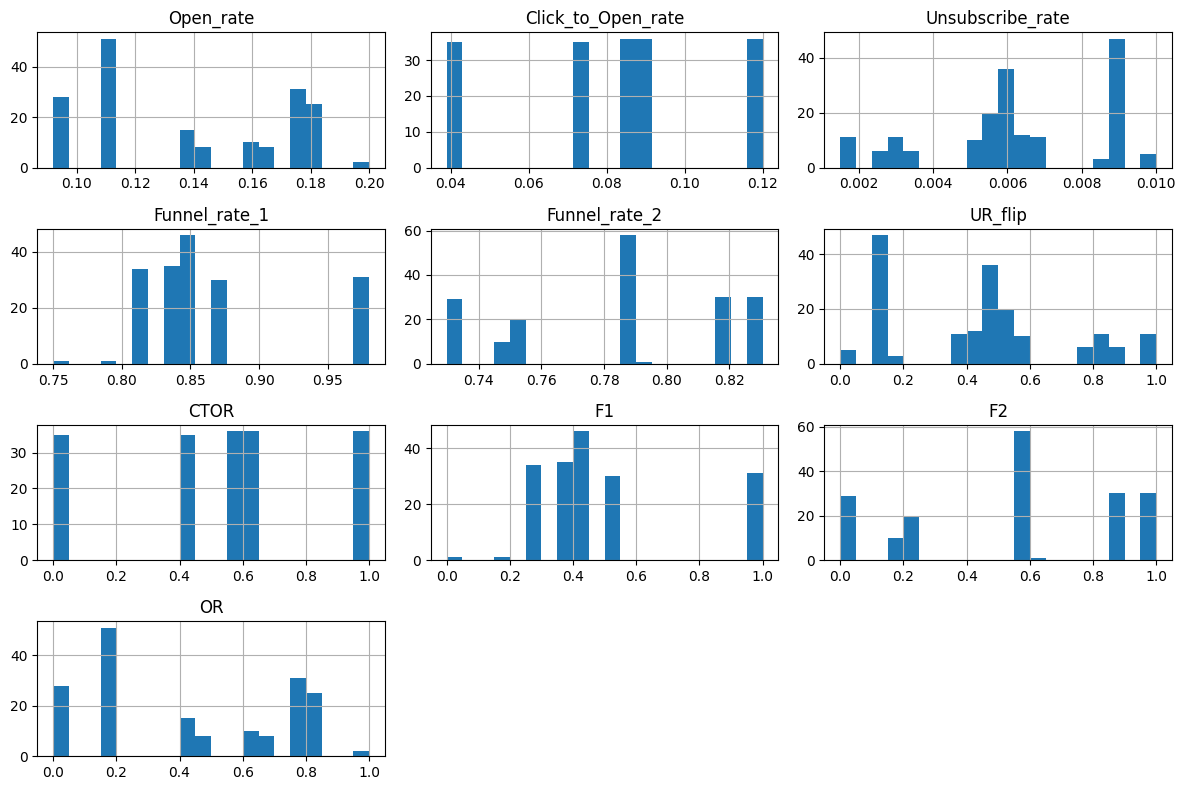

In [17]:
email_pivot.hist(bins=20, figsize=(12, 8))
plt.tight_layout()

## Рейтинг №1

Для определения лучшей темы рассылки я решил опираться на следующие показатели:

- **Конверсии на этапах воронки продаж** – ключевой критерий эффективности, т. к. маркетинг – это продажи. Наибольший вес имеют конверсии на первом (30%) и финальном (25%) этапах воронки.
- **Store (переходы на сайт)** – 20%. Этот показатель отражает интерес к письму и качество наполнения: чем больше переходов, тем лучше тема мотивирует.
- **Open Rate (OR)** – 10%. Можно было бы не учитывать, но открываемость письма тоже отражает интерес к теме, поэтому оставляем с меньшим весом.
- **Unsubscribe (UR_flip)** – 15%. Высокий уровень отписок снижает рейтинг темы, потому что даже финансово успешная рассылка с высокой отпиской считается нерелевантной или неудачной.

Таким образом, финальный рейтинг учитывает **продажную эффективность, интересность письма и релевантность**.


In [18]:
email_pivot['rating'] = ((email_pivot['CTOR'] * 0.20)
    + (email_pivot['F1'] * 0.30) 
    + (email_pivot['F2'] * 0.25)
    + (email_pivot['OR'] * 0.10)
    + (email_pivot['UR_flip'] * 0.15)
)

# нормируем рейтинг
email_pivot['rating'] = (email_pivot['rating'] - email_pivot['rating'].min()) / \
                         (email_pivot['rating'].max() - email_pivot['rating'].min())

In [19]:
# избавимся от рассчетных исходных ненормированных столбцов
email_pivot.drop(['Open_rate', 
                  'Click_to_Open_rate', 
                  'Unsubscribe_rate', 
                  'Funnel_rate_1', 
                  'Funnel_rate_2'], axis=1, inplace=True)

# посмотрим на финальный рейтинг
email_pivot.sort_values(by='rating', ascending=False).head(10)

,Тема письма,UR_flip,CTOR,F1,F2,OR,rating
65,Тема письма 158,0.482344,0.99992,0.998913,0.894561,0.814816,1.0
131,Тема письма 217,0.999947,0.629634,0.999067,0.894901,0.762039,0.997804
125,Тема письма 211,0.999953,0.999917,0.999072,0.894604,0.000002,0.994686
120,Тема письма 207,0.847012,0.999918,0.999269,0.597346,0.762036,0.965191
0,Тема письма 1,0.000099,0.999923,0.999022,0.993447,1.0,0.959166
70,Тема письма 162,0.482355,1.0,0.998851,0.994961,0.171302,0.944851
10,Тема письма 108,0.152958,0.999918,0.999365,0.993996,0.444446,0.913662
46,Тема письма 140,0.470608,0.629643,0.999669,0.991162,0.482413,0.881027
30,Тема письма 126,0.43532,0.999929,0.999506,0.596610,0.482412,0.838986
76,Тема письма 168,0.505881,0.629617,0.998994,0.994041,0.000004,0.821402


## Рейтинг №2

Для оценки интересности темы без финансовой составляющей я составил отдельный рейтинг:

- **Store** – 50%. Переходы на сайт показывают привлекательность темы и контента.
- **Unsubscribe (UR_flip)** – 30%. Отписки важны, чтобы не давать высокий рейтинг нерелевантным письмам.
- **Open Rate (OR)** – 20%. Этот показатель дополняет Store и учитывает вовлеченность по открытию писем, хотя сильно коррелирует с CTR.

Такой рейтинг позволяет выявлять **лучшую тему с точки зрения интереса к контенту**, без учета продаж.

In [20]:
email_pivot['rating2'] = ((email_pivot['CTOR'] * 0.50)
    + (email_pivot['OR'] * 0.20)
    + (email_pivot['UR_flip'] * 0.30)
)

# нормируем рейтинг
email_pivot['rating2'] = (email_pivot['rating2'] - email_pivot['rating2'].min()) / \
                         (email_pivot['rating2'].max() - email_pivot['rating2'].min())

In [21]:
email_pivot.sort_values(by='rating2', ascending=False).head(10)

,Тема письма,UR_flip,CTOR,F1,F2,OR,rating,rating2
120,Тема письма 207,0.847012,0.999918,0.999269,0.597346,0.762036,0.965191,1.0
110,Тема письма 199,0.776463,0.999929,0.520912,0.002027,0.762041,0.539597,0.974718
105,Тема письма 194,0.776424,0.999939,0.434157,0.596716,0.762038,0.711907,0.974709
65,Тема письма 158,0.482344,0.99992,0.998913,0.894561,0.814816,1.0,0.881891
55,Тема письма 149,0.482263,0.999963,0.521558,0.200244,0.814816,0.554915,0.881888
130,Тема письма 216,0.999909,0.999945,0.269001,0.994478,0.000002,0.722043,0.872714
125,Тема письма 211,0.999953,0.999917,0.999072,0.894604,0.000002,0.994686,0.872713
95,Тема письма 185,0.482312,0.999945,0.434294,0.894716,0.762039,0.754655,0.869282
50,Тема письма 144,0.482325,0.999932,0.269011,0.001382,0.762037,0.371206,0.869278
45,Тема письма 14,0.470567,0.999919,0.269089,0.596996,0.659259,0.563525,0.840494


Посмотрим на итоговое распределение признаков.

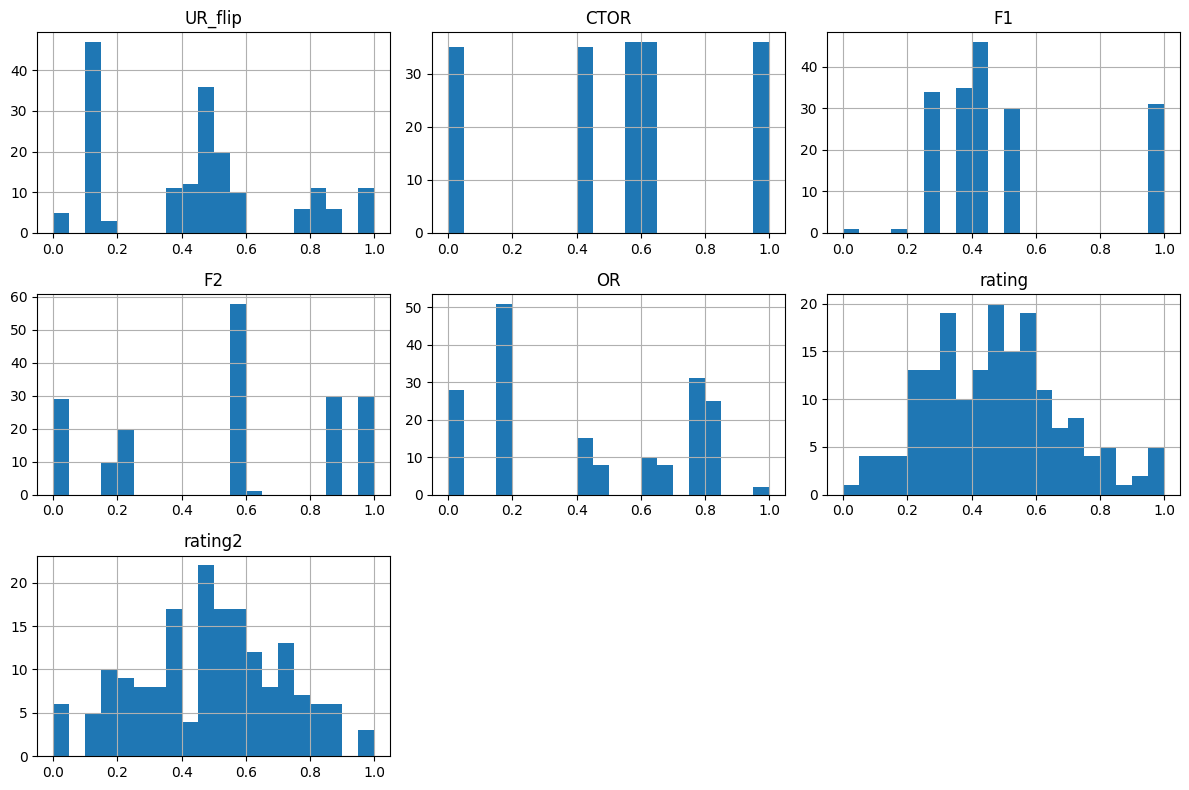

In [22]:
email_pivot.hist(bins=20, figsize=(12, 8))
plt.tight_layout()

Как видим, оба распределения имеют форму, близкую к нормальному — что говорит о адекватной оценочной модели: высоких и провальных рейтингов немного, основную массу составляют средние значения. Для более наглядного линейного представления рейтинга применим **степенную трансформацию**.

In [23]:
alpha = 2
email_pivot['rating_skewed'] = email_pivot['rating'] ** alpha
email_pivot['rating_skewed2'] = email_pivot['rating2'] ** alpha

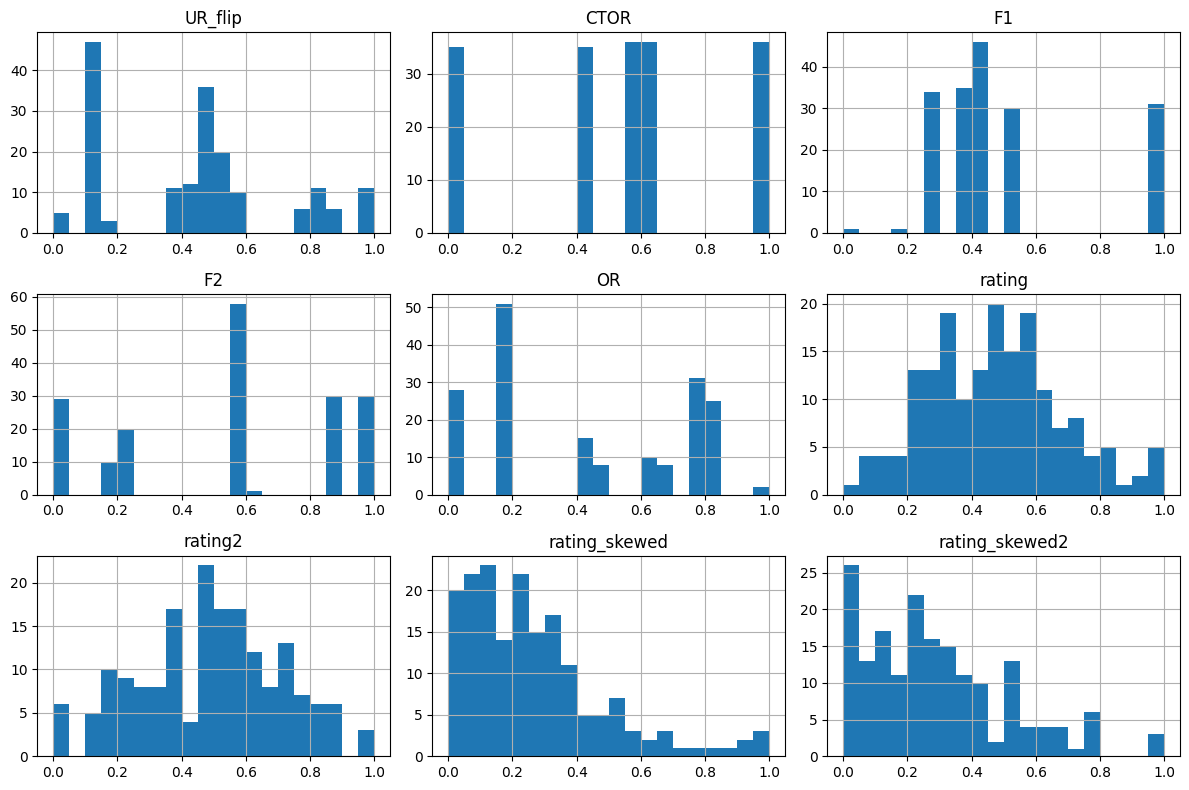

In [24]:
email_pivot.hist(bins=20, figsize=(12, 8))  # bins = количество корзин
plt.tight_layout()

In [25]:
email_pivot.sort_values(by='rating_skewed', ascending=False).head(10)

,Тема письма,UR_flip,CTOR,F1,F2,OR,rating,rating2,rating_skewed,rating_skewed2
65,Тема письма 158,0.482344,0.99992,0.998913,0.894561,0.814816,1.0,0.881891,1.0,0.777732
131,Тема письма 217,0.999947,0.629634,0.999067,0.894901,0.762039,0.997804,0.833597,0.995613,0.694883
125,Тема письма 211,0.999953,0.999917,0.999072,0.894604,0.000002,0.994686,0.872713,0.989401,0.761628
120,Тема письма 207,0.847012,0.999918,0.999269,0.597346,0.762036,0.965191,1.0,0.931594,1.0
0,Тема письма 1,0.000099,0.999923,0.999022,0.993447,1.0,0.959166,0.753277,0.919999,0.567427
70,Тема письма 162,0.482355,1.0,0.998851,0.994961,0.171302,0.944851,0.728155,0.892743,0.53021
10,Тема письма 108,0.152958,0.999918,0.999365,0.993996,0.444446,0.913662,0.675303,0.834778,0.456034
46,Тема письма 140,0.470608,0.629643,0.999669,0.991162,0.482413,0.881027,0.577023,0.776208,0.332956
30,Тема письма 126,0.43532,0.999929,0.999506,0.596610,0.482412,0.838986,0.785602,0.703897,0.61717
76,Тема письма 168,0.505881,0.629617,0.998994,0.994041,0.000004,0.821402,0.474365,0.674701,0.225022


In [26]:
email_pivot.sort_values(by='rating_skewed2', ascending=False).head(10)

,Тема письма,UR_flip,CTOR,F1,F2,OR,rating,rating2,rating_skewed,rating_skewed2
120,Тема письма 207,0.847012,0.999918,0.999269,0.597346,0.762036,0.965191,1.0,0.931594,1.0
110,Тема письма 199,0.776463,0.999929,0.520912,0.002027,0.762041,0.539597,0.974718,0.291165,0.950075
105,Тема письма 194,0.776424,0.999939,0.434157,0.596716,0.762038,0.711907,0.974709,0.506811,0.950057
65,Тема письма 158,0.482344,0.99992,0.998913,0.894561,0.814816,1.0,0.881891,1.0,0.777732
55,Тема письма 149,0.482263,0.999963,0.521558,0.200244,0.814816,0.554915,0.881888,0.30793,0.777727
130,Тема письма 216,0.999909,0.999945,0.269001,0.994478,0.000002,0.722043,0.872714,0.521346,0.761629
125,Тема письма 211,0.999953,0.999917,0.999072,0.894604,0.000002,0.994686,0.872713,0.989401,0.761628
95,Тема письма 185,0.482312,0.999945,0.434294,0.894716,0.762039,0.754655,0.869282,0.569504,0.755652
50,Тема письма 144,0.482325,0.999932,0.269011,0.001382,0.762037,0.371206,0.869278,0.137794,0.755645
45,Тема письма 14,0.470567,0.999919,0.269089,0.596996,0.659259,0.563525,0.840494,0.31756,0.70643


Таким образом можем четко выделить группу лидеров в рамках каждого рейтинга. Как видно, в обоих случаях у значения 1 скопилось минимум наблюдений. В случае с первым и вторым рейтингом мы видим переходный этап около 0.8, что позволяет легко определить топ лучших тем: все, кто выше 0.8, попадают в топ-10. Финальные таблицы можно считать корректными, расширять топ не требуется, так как лидеры явно выделяются от основной массы ниже порогового значения.

## Вывод

- Если учитывать маркетинговую (финансовую) эффективность, лучшая тема – **158**.  
- Если оценивать только интересность контента – лучшая тема – **207**.  

Однако учитывая, что тема 158 во втором рейтинге находится сразу после трёх выдающихся лидеров, её можно признать **самой интересной среди самых прибыльных** и **самой прибыльной среди самых интересных**.  

(Кстати, при построении ансамблевого рейтинга, даже при двойном учёте интереса, тема 158 сохраняла лидерство.)

**Итоговый вывод:** лучшая тема – **158**.

## Создадим датасет для визуализации воронки продаж.

In [27]:
funnel = df[['Доставлено', 'Отправлено', 'Открытия', 'Клики', 'Пользователей на сайте', 'Отписки',
                  'Воронка продаж. Шаг 1', 'Воронка продаж. Шаг 2', 'Воронка продаж. Шаг 3']].copy()
funnel['0'] = '0'
funnel['1'] = funnel['Доставлено'] / funnel['Отправлено']
funnel['2'] = funnel['Открытия'] / funnel['Отправлено']
funnel['3'] = funnel['Клики'] / funnel['Отправлено']
funnel['4'] = funnel['Пользователей на сайте'] / funnel['Отправлено']
funnel['5'] = funnel['Воронка продаж. Шаг 2'] / funnel['Отправлено']
funnel['6'] = funnel['Воронка продаж. Шаг 3'] / funnel['Отправлено']

funnel

,Доставлено,Отправлено,Открытия,Клики,Пользователей на сайте,Отписки,Воронка продаж. Шаг 1,Воронка продаж. Шаг 2,Воронка продаж. Шаг 3,0,1,2,3,4,5,6
0,741750,780789,148350,17802,16378,7417,6337,6210,5154,0,0.950001,0.19,0.0228,0.020976,0.007953,0.006601
1,683402,719370,123012,11071,10296,6834,3558,3096,2539,0,0.950001,0.171,0.01539,0.014313,0.004304,0.003529
2,1141344,1201415,182615,15340,13959,11413,3370,2864,2263,0,0.95,0.152,0.012768,0.011619,0.002384,0.001884
3,1324136,1393827,264827,10328,8986,13241,5116,4277,3208,0,0.95,0.19,0.00741,0.006447,0.003069,0.002302
4,1212980,1276821,218336,15720,10847,12130,2817,2287,1670,0,0.95,0.171,0.012312,0.008495,0.001791,0.001308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2421707,2458586,422104,16462,14322,21795,8155,7992,6314,0,0.985,0.171686,0.006696,0.005825,0.003251,0.002568
214,1077268,1099253,119038,8571,5914,9695,1536,1336,1109,0,0.98,0.10829,0.007797,0.00538,0.001215,0.001009
215,2012963,2054044,185193,22223,21556,18117,8991,7643,6267,0,0.98,0.09016,0.010819,0.010494,0.003721,0.003051
216,992259,1007370,109645,9868,8388,8930,5082,3812,3011,0,0.985,0.108843,0.009796,0.008327,0.003784,0.002989


In [28]:
funnel_pivot = funnel.pivot_table(index='0', values=['1', 
                                                       '2', 
                                                       '3', 
                                                       '4', 
                                                       '5', 
                                                       '6'], aggfunc='sum').reset_index()
funnel_pivot.drop('0', axis=1, inplace=True)
funnel_pivot = funnel_pivot.T
funnel_pivot

,0
1,212.870003
2,29.287765
3,2.384071
4,2.09034
5,0.737209
6,0.57434


In [29]:
funnel_pivot.to_excel(r'C:\Users\Chekun\Downloads\funnel_pivot.xlsx')